In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from aging.plotting import format_plots, PlotConfig, save_factory, figure, legend, format_pizza_plots
from collections import Counter
from matplotlib.lines import Line2D

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import colorcet as cc
from operator import add
from tqdm.auto import tqdm
from functools import reduce
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.spatial.distance import squareform, pdist
from sklearn.metrics import silhouette_score
from aging.plotting import format_plots, figure, save_factory, PlotConfig, legend, add_identity
from sklearn.feature_selection import mutual_info_classif as MIC
from sklearn.feature_selection import mutual_info_regression as MIR

In [3]:
format_plots()
c = PlotConfig()

In [4]:
from matplotlib.colors import LinearSegmentedColormap
# Define the color map
colors = ['#d94801','white','#008C8D']
custom_cmap = LinearSegmentedColormap.from_list("custom_purples", colors, N=256)
cmmf=custom_cmap

colors = ['#dadaeb','#6a51a3']
custom_cmap = LinearSegmentedColormap.from_list("custom_purples", colors, N=256)
cma=custom_cmap

colors = ['white','gray']
custom_cmap = LinearSegmentedColormap.from_list("custom_purples", colors, N=256)
cma=custom_cmap

colors = ['#ccece6','#99d8c9','#66c2a4','#41ae76','#238b45','#006d2c']
cml = sns.blend_palette(colors, n_colors=256, as_cmap=True)

# Define the color map
colors = ['#fee6ce','#d94801']
custom_cmap = LinearSegmentedColormap.from_list("custom_purples", colors, N=256)
cmf=custom_cmap

colors = ['#c7eae5','#008C8D']
custom_cmap = LinearSegmentedColormap.from_list("custom_purples", colors, N=256)
cmm=custom_cmap

In [5]:
# prepare colors for plot
from matplotlib.colors import LinearSegmentedColormap
colors = ['#c7eae5','#008C8D']
import matplotlib
cmap = LinearSegmentedColormap.from_list("custom_purples", colors, N=256)
matplotlib.cm.register_cmap("dana", cmap)
phasec = sns.color_palette("dana", n_colors=27)


# prepare colors for plot
from matplotlib.colors import LinearSegmentedColormap
colors = ['#fee6ce','#d94801']
import matplotlib
cmap = LinearSegmentedColormap.from_list("custom_purples", colors, N=256)
matplotlib.cm.register_cmap("dana2", cmap)
phasecf = sns.color_palette("dana2", n_colors=27)

/tmp/ipykernel_28250/813501115.py:6: MatplotlibDeprecationWarning: The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.register(name)`` instead.
  matplotlib.cm.register_cmap("dana", cmap)
/tmp/ipykernel_28250/813501115.py:15: MatplotlibDeprecationWarning: The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.register(name)`` instead.
  matplotlib.cm.register_cmap("dana2", cmap)


In [6]:
def mm_norm_col(column):
    return (column - column.min()) / (column.max() - column.min())

/tmp/ipykernel_28250/1665538789.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_data['sex'] = 'm'
/tmp/ipykernel_28250/1665538789.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_data['sex'] = 'f'


In [9]:
#average and normalize male
avg_m_df = m_data.groupby(['age']).mean()
# normalize the data
m_norm = mm_norm_col(m_data)
avg_m_norm = mm_norm_col(avg_m_df)

#average and normalize female
avg_f_df = f_data.groupby(['age']).mean()
# normalize the data
f_norm = mm_norm_col(f_data)
avg_f_norm = mm_norm_col(avg_f_df)
data=pd.concat([m_data,f_data])

In [10]:
data.groupby(['age', 'sex']).size().reset_index(name='count')

,age,sex,count
0,4.0,f,16
1,4.0,m,16
2,8.0,f,16
3,8.0,m,16
4,12.0,f,16
5,12.0,m,16
6,20.0,f,16
7,20.0,m,16
8,24.0,f,16
9,24.0,m,16


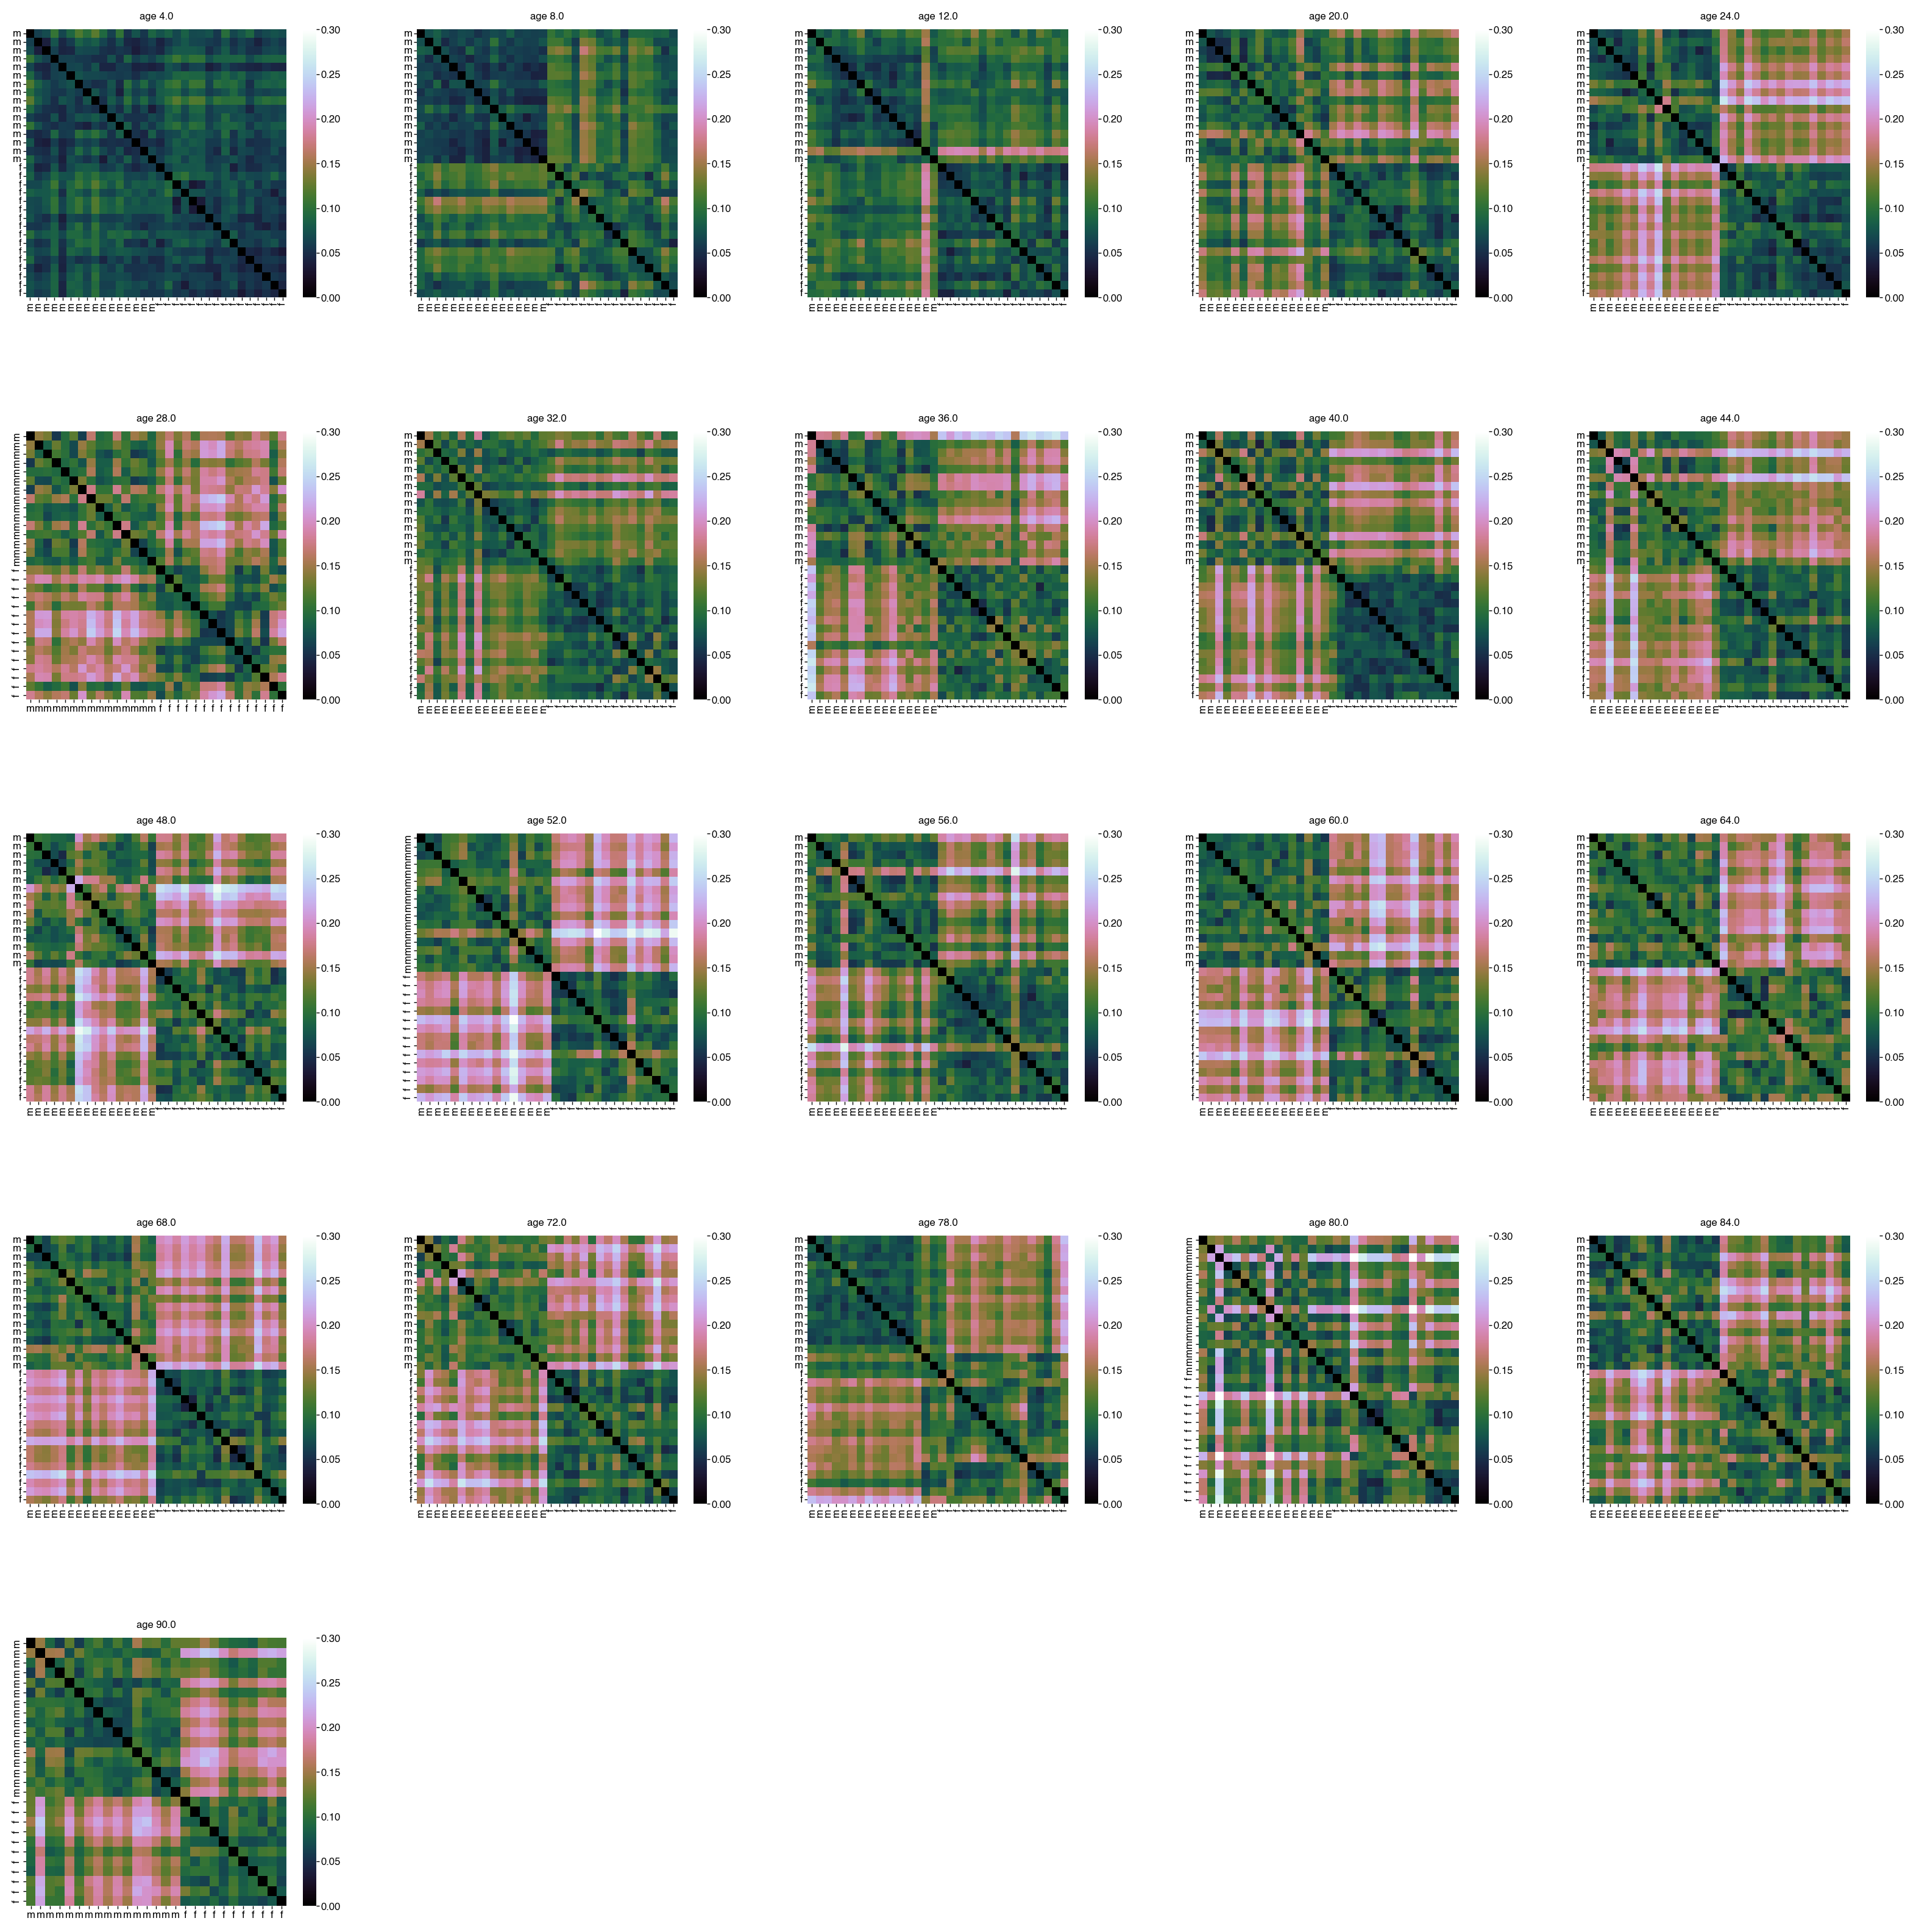

In [22]:
n=0
dist=[]
ages=[]
fig=plt.figure(figsize=(20, 20))
plt.subplots_adjust(hspace=0.5)
for age,_df in enumerate(data.groupby('age')):
    x = _df[1]
    sex = _df[1].index.get_level_values('sex').to_numpy()
    ax = plt.subplot(5, 5, n + 1)
    a=squareform(pdist(x, metric='Euclidean'))
    sns.heatmap(a,cmap ='cubehelix',
                vmax=0.3, 
                xticklabels= sex,
                yticklabels= sex
               )
    nm=sum(sex=='m')
    nf=sum(sex=='f')
    temp=a[0:nm,nm:]
    dist.extend(temp.mean(axis=1))
    ages.extend(_df[1][sex=='m'].index.get_level_values('age'))
    sns.heatmap(x.T,cmap = 'cubehelix',vmax=0.1, xticklabels= sex)
    ax.set_title('age ' + str(_df[0]))
    n=n+1

In [ ]:
c = PlotConfig()
fig.savefig(c.dana_save_path / "fig3"/ 'fvm_dist_per_age_heatmaps.pdf', bbox_inches='tight')

In [23]:
df = pd.DataFrame()
df['dist'] = dist
df['age'] = ages

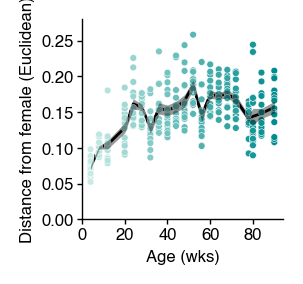

In [30]:
fig, ax = plt.subplots(figsize=(1.3, 1.3))
a = sns.scatterplot(
    data=df,
    x="age",
    y="dist",
    palette=cmm,
    hue="age",
    legend=False,
    s=6,
    linewidths=0,
    alpha=1,
    zorder=1,
)

a = sns.lineplot(
    data=df,
    x="age",
    y="dist",
    zorder=-1,
    color='black',
    err_kws={"lw": 0, "alpha": 0.4},
    errorbar=("se"),
)

a.set(
    ylim=(0.0, 0.28),
    xlim=(0, None),
    xlabel="Age (wks)",
    ylabel="Distance from female (Euclidean)",
    xticks=[0,20,40,60,80],
)
sns.despine()

In [31]:
c = PlotConfig()
fig.savefig(c.dana_save_path / "fig3"/ 'fvm_dist_line.pdf', bbox_inches='tight')